# Discussion 03: Plotting and Functions

Welcome to Discussion 03! 

This week, we will go over plotting, writing functions, and utilizing the ```.apply()``` function to modify DataFrames.

You can find additional help on these topics in the course [textbook](https://eldridgejm.github.io/dive_into_data_science/front.html).

[Here](https://ucsd-ets.github.io/dsc10-2020-fa/published/default/reference/babypandas-reference.pdf) is a pointer to that reference sheet we saw last time.

<img src="data/panda_lounging.jpeg" width="1000">

### Remember the calfire dataset?
We're going to use it again!

In [12]:
import babypandas as bpd
import numpy as np

import otter
grader = otter.Notebook()

calfire = bpd.read_csv('data/calfire-full.csv')
calfire

,year,month,name,cause,acres,county,longitude,latitude
0,1898,9,LOS PADRES,14 - Unknown,20539.949219,Ventura,-119.367830,34.446830
1,1898,4,MATILIJA,14 - Unknown,2641.123047,Ventura,-119.299625,34.488614
2,1898,9,COZY DELL,14 - Unknown,2974.585205,Ventura,-119.265380,34.482316
3,1902,8,FEROUD,14 - Unknown,731.481567,Ventura,-119.320979,34.417515
4,1903,10,SAN ANTONIO,14 - Unknown,380.260590,Ventura,-119.253422,34.430616
...,...,...,...,...,...,...,...,...
13459,2019,9,STAGE,7 - Arson,13.019149,Monterey,-121.599207,36.764065
13460,2019,10,CROSS,14 - Unknown,289.151428,Monterey,-120.726245,35.793698
13461,2019,9,FRUDDEN,2 - Equipment Use,11.789393,Monterey,-120.908061,35.908627
13462,2019,9,JOLON,11 - Powerline,61.592369,Monterey,-121.010025,35.910750


# Plotting

We can visualize and plot our data directly from DataFrames! 
This can be very beneficial to help us draw conclusions that would be difficult to come up with otherwise.

`df.plot(kind='...', x=..., y=...)`
- `kind= ` "scatter", "line", "bar", "barh"

`df.get(col_name).plot(kind='hist', bins=n_bins, density=True)`

## Question 1: Is the number of fires increasing?

*set ```count_is_increasing``` to True if the the number of fires is increasing*

<!--
BEGIN QUESTION
name: q11
-->

In [10]:
count_is_increasing = True
count_is_increasing

True

In [13]:
grader.check("q11")

AssertionError: Test q11 does not exist

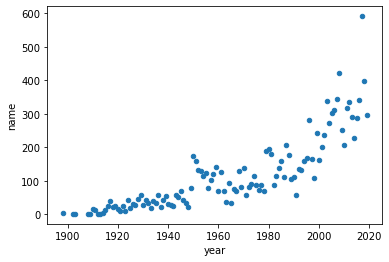

In [7]:
counts_by_year = (
    calfire
    .drop(columns=["month","cause","acres","county","longitude","latitude"])
    .groupby("year").count()
    .reset_index()
)
counts_by_year.plot(kind='scatter',x='year',y='name')

## Question 2: What about the median size of a fire? (is it also increasing?)
*set ```median_is_increasing``` to True if the the median fire size is increasing*

<!--
BEGIN QUESTION
name: q12
-->

In [18]:
median_is_increasing = False
median_is_increasing

False

In [19]:
grader.check("q12")

AssertionError: Test q12 does not exist

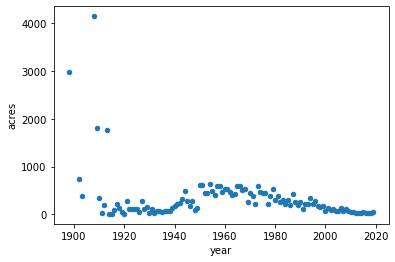

In [17]:
median_by_year = (
    calfire
    .drop(columns=["month","cause","name","county","longitude","latitude"])
    .groupby("year").median()
    .reset_index()
)
median_by_year.plot(kind='scatter',x='year',y='acres')

## Question 3: Is the largest fire per year increasing?
*set ```max_fire_is_increasing``` to True if the the largest fire per year is increasing*

<!--
BEGIN QUESTION
name: q13
-->

In [21]:
max_is_increasing = True
max_is_increasing

True

In [ ]:
grader.check("q13")

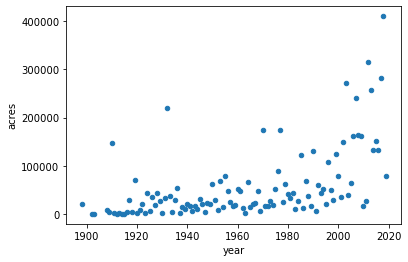

In [20]:
max_fire_by_year = (
    calfire
    .drop(columns=["month","cause","name","county","longitude","latitude"])
    .groupby("year").max()
    .reset_index()
)
max_fire_by_year.plot(kind='scatter',x='year',y='acres')

## Question 4: Is there an association between latitude and fire size?
*set ```latitude_size_association``` to True if there is an association between latitude and fire size*

<!--
BEGIN QUESTION
name: q14
-->

In [26]:
latitude_size_association = False
latitude_size_association 

False

In [ ]:
grader.check("q14")

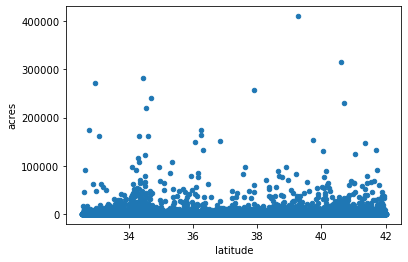

In [25]:
lat_fire = (
    calfire
    .drop(columns=["month","name","cause","county","longitude","year"])
)
lat_fire.plot(kind='scatter', x='latitude',y='acres')

## Question 5: What is the distribution of fire sizes?

,acres
0,20539.949219
1,2641.123047
2,2974.585205
3,731.481567
4,380.260590
...,...
13459,13.019149
13460,289.151428
13461,11.789393
13462,61.592369


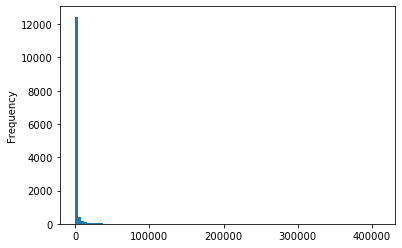

In [39]:
acres_df = calfire.drop(columns=["month","name","cause","latitude","longitude","county","year"]) # <-- not necessary here bc .get() below
acres_df.get("acres").plot(kind='hist',bins=100)
acres_df

,acres
3,731.481567
4,380.260590
5,859.348816
7,450.534729
9,497.885071
...,...
13458,8.221602
13459,13.019149
13460,289.151428
13461,11.789393


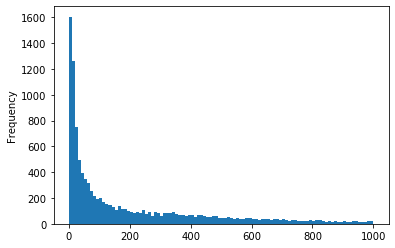

In [38]:
small_fires = acres_df[(acres_df.get("acres") < 1000)]
small_fires.get("acres").plot(kind="hist",bins=100)
small_fires

## Question 6: Plot the number of fires due to each cause.

In [40]:
calfire

,year,month,name,cause,acres,county,longitude,latitude
0,1898,9,LOS PADRES,14 - Unknown,20539.949219,Ventura,-119.367830,34.446830
1,1898,4,MATILIJA,14 - Unknown,2641.123047,Ventura,-119.299625,34.488614
2,1898,9,COZY DELL,14 - Unknown,2974.585205,Ventura,-119.265380,34.482316
3,1902,8,FEROUD,14 - Unknown,731.481567,Ventura,-119.320979,34.417515
4,1903,10,SAN ANTONIO,14 - Unknown,380.260590,Ventura,-119.253422,34.430616
...,...,...,...,...,...,...,...,...
13459,2019,9,STAGE,7 - Arson,13.019149,Monterey,-121.599207,36.764065
13460,2019,10,CROSS,14 - Unknown,289.151428,Monterey,-120.726245,35.793698
13461,2019,9,FRUDDEN,2 - Equipment Use,11.789393,Monterey,-120.908061,35.908627
13462,2019,9,JOLON,11 - Powerline,61.592369,Monterey,-121.010025,35.910750


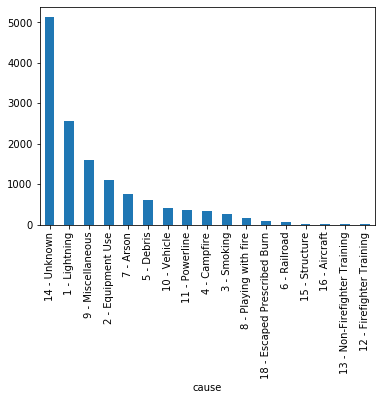

In [47]:
(
    calfire
    .groupby('cause').count()
    .get("year")
    .sort_values(ascending=False)
    .plot(kind = 'bar')
)

## Question 7a: In what times of the year are fires most common?

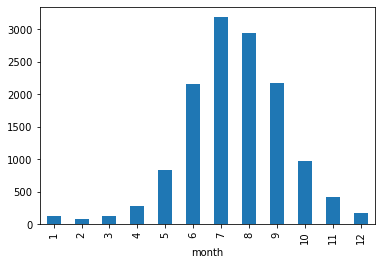

In [51]:
(
    calfire
    .groupby("month").count()
    .get("year")
    .plot(kind="bar")
)

## Question 7b: In what times of the year are *large* fires most common in *Southern California*?

By large, say over 5,000 acres. By SoCal, we mean latitude < 37.

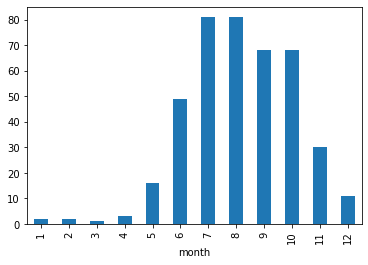

In [53]:
(
    calfire[(calfire.get("acres") > 5000) & (calfire.get("latitude") < 37)]
    .groupby("month").count()
    .get("year")
    .plot(kind="bar")
)

## Question 8: On the same plot, show natural vs. human-caused over time.

- That is, have one line for the number of fires caused by lightning over time.
- Another line for all other causes over time.

In [66]:
calfire

,year,month,name,cause,acres,county,longitude,latitude
0,1898,9,LOS PADRES,14 - Unknown,20539.949219,Ventura,-119.367830,34.446830
1,1898,4,MATILIJA,14 - Unknown,2641.123047,Ventura,-119.299625,34.488614
2,1898,9,COZY DELL,14 - Unknown,2974.585205,Ventura,-119.265380,34.482316
3,1902,8,FEROUD,14 - Unknown,731.481567,Ventura,-119.320979,34.417515
4,1903,10,SAN ANTONIO,14 - Unknown,380.260590,Ventura,-119.253422,34.430616
...,...,...,...,...,...,...,...,...
13459,2019,9,STAGE,7 - Arson,13.019149,Monterey,-121.599207,36.764065
13460,2019,10,CROSS,14 - Unknown,289.151428,Monterey,-120.726245,35.793698
13461,2019,9,FRUDDEN,2 - Equipment Use,11.789393,Monterey,-120.908061,35.908627
13462,2019,9,JOLON,11 - Powerline,61.592369,Monterey,-121.010025,35.910750


In [56]:
cause_only_fire = calfire.drop(columns=["month","name","acres","county","longitude","latitude"])
cause_only_fire.get("cause")

0             14 - Unknown
1             14 - Unknown
2             14 - Unknown
3             14 - Unknown
4             14 - Unknown
               ...        
13459            7 - Arson
13460         14 - Unknown
13461    2 - Equipment Use
13462       11 - Powerline
13463         14 - Unknown
Name: cause, Length: 13464, dtype: object

In [64]:
natural_fires = (
    cause_only_fire[(cause_only_fire.get("cause") == "1 - Lightning") & (cause_only_fire.get("cause") != "14 - Unknown")]
    .groupby("year").count()
    .get("cause")
)

natural_fires

year
1910      2
1911      1
1914      1
1915      3
1917      6
       ... 
2015    108
2016     26
2017    131
2018     39
2019     59
Name: cause, Length: 104, dtype: int64

In [63]:
human_caused_fires = (
    cause_only_fire[(cause_only_fire.get("cause") != "1 - Lightning") & (cause_only_fire.get("cause") != "14 - Unknown")]
    .groupby("year").count()
    .get("cause")
)
human_caused_fires

year
1910      9
1911      8
1914      4
1915      9
1916     11
       ... 
2015    115
2016    180
2017    271
2018    187
2019    156
Name: cause, Length: 108, dtype: int64

In [90]:
type(human_caused_fires)

babypandas.bpd.Series

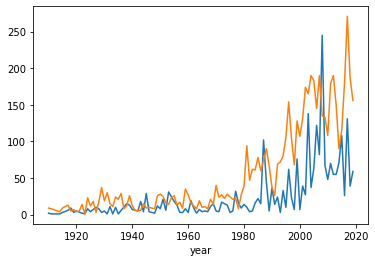

In [65]:
natural_fires.plot(kind="line")
human_caused_fires.plot(kind="line")

# Functions and Apply

Now lets take a look at writing our own functions and then applying these functions to DataFrames.

## Question 9: Cause Codes

- Currently, the causes are written as `<code> - <name>`. Like: `7 - Arson`.
- Write a function which takes in the cause and outputs only the name.

In [74]:
cause_old_list = list(calfire.groupby("cause").count().index)
cause_old_list

['1 - Lightning',
 '10 - Vehicle',
 '11 - Powerline',
 '12 - Firefighter Training',
 '13 - Non-Firefighter Training',
 '14 - Unknown',
 '15 - Structure',
 '16 - Aircraft',
 '18 - Escaped Prescribed Burn',
 '2 - Equipment Use',
 '3 - Smoking',
 '4 - Campfire',
 '5 - Debris',
 '6 - Railroad',
 '7 - Arson',
 '8 - Playing with fire',
 '9 - Miscellaneous']

In [73]:
def convert_cause(cause):
    
    split_cause = cause.split(" ")
    cause_name = " ".join(split_cause[2:])
    
    return cause_name

In [76]:
for old_cause in cause_old_list:
    print(f"{old_cause} --> {convert_cause(old_cause)}")

1 - Lightning --> Lightning
10 - Vehicle --> Vehicle
11 - Powerline --> Powerline
12 - Firefighter Training --> Firefighter Training
13 - Non-Firefighter Training --> Non-Firefighter Training
14 - Unknown --> Unknown
15 - Structure --> Structure
16 - Aircraft --> Aircraft
18 - Escaped Prescribed Burn --> Escaped Prescribed Burn
2 - Equipment Use --> Equipment Use
3 - Smoking --> Smoking
4 - Campfire --> Campfire
5 - Debris --> Debris
6 - Railroad --> Railroad
7 - Arson --> Arson
8 - Playing with fire --> Playing with fire
9 - Miscellaneous --> Miscellaneous


In [71]:
'1 - Lightning'.split(" ")[2:]

['Lightning']

In [72]:
'13 - Non-Firefighter Training'.split(" ")[2:]

['Non-Firefighter', 'Training']

## Question 10:  Replace the `cause` column with one containing only the names

In [80]:
cause_names = calfire.get("cause").apply(convert_cause)
cause_names

0              Unknown
1              Unknown
2              Unknown
3              Unknown
4              Unknown
             ...      
13459            Arson
13460          Unknown
13461    Equipment Use
13462        Powerline
13463          Unknown
Name: cause, Length: 13464, dtype: object

In [83]:
calfire = calfire.assign(cause_names_again=cause_names)
calfire

,year,month,name,cause,acres,county,longitude,latitude,cause_names_again
0,1898,9,LOS PADRES,Unknown,20539.949219,Ventura,-119.367830,34.446830,Unknown
1,1898,4,MATILIJA,Unknown,2641.123047,Ventura,-119.299625,34.488614,Unknown
2,1898,9,COZY DELL,Unknown,2974.585205,Ventura,-119.265380,34.482316,Unknown
3,1902,8,FEROUD,Unknown,731.481567,Ventura,-119.320979,34.417515,Unknown
4,1903,10,SAN ANTONIO,Unknown,380.260590,Ventura,-119.253422,34.430616,Unknown
...,...,...,...,...,...,...,...,...,...
13459,2019,9,STAGE,Arson,13.019149,Monterey,-121.599207,36.764065,Arson
13460,2019,10,CROSS,Unknown,289.151428,Monterey,-120.726245,35.793698,Unknown
13461,2019,9,FRUDDEN,Equipment Use,11.789393,Monterey,-120.908061,35.908627,Equipment Use
13462,2019,9,JOLON,Powerline,61.592369,Monterey,-121.010025,35.910750,Powerline


## Question 11:  Convert months numbers to names.

- Write a function that converts a month's number (1, 2, 3, ..., 12) to the word (January, ..., December).

In [84]:
def month_number_to_name(month_number):
    import calendar
    month_name = calendar.month_name[month_number]
    return month_name

In [85]:
month_number_to_name(1)

'January'

In [87]:
num_to_name = ['January', 'February']

In [89]:
num_to_name[0]

'January'

## Question 12:  Closest fire

- Write a function that accepts a latitude/longitude pair and returns the name of the closest fire.

In [32]:
grader.check_all()